In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import pickle

## load the IATA data
with open('data/IATA.json') as f:
    IATA = json.load(f)
    
## load the graph network
with open('data/graphnetwork.gpickle', 'rb') as f:
    G = pickle.load(f)
    
with open('data/continent_to_reviews.pkl', 'rb') as f:
    continent_to_reviews = pickle.load(f)

In [11]:
import numpy as np
size = len(G.nodes())
num_edges = len(G.edges())
print(f"{size=}, {num_edges=}")
p = (2 * num_edges) / (size * (size - 1))
print(f"{p=}")

def createRandomGraph(p : float, N : int) -> nx.Graph:
    """
    Create a random graph with N nodes and probability p
    """
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)
    for i in range(N):
        for j in range(i+1, N):
            if np.random.rand() < p:
                G.add_edge(i, j)
    return G

random_graph = createRandomGraph(p, size)

size=3256, num_edges=37038
p=0.0069894360216940865


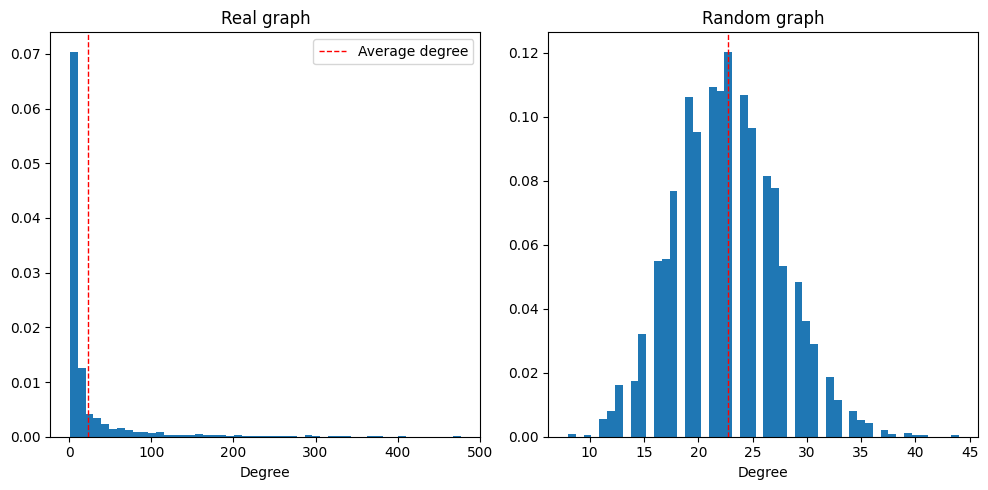

real_avg_degree=22.75061425061425, random_avg_degree=22.701474201474202


In [13]:
## find the distribution of the degree of the nodes
import matplotlib.pyplot as plt
degrees_real = [G.degree(n) for n in G.nodes()]
degrees_random = [random_graph.degree(n) for n in random_graph.nodes()]
real_avg_degree = np.mean(degrees_real)
random_avg_degree = np.mean(degrees_random)
max_degree = max(max(degrees_real), max(degrees_random))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(degrees_real, bins=50, density=True)
axs[1].hist(degrees_random, bins=50, density=True)
axs[0].set_title("Real graph")
axs[1].set_title("Random graph")
axs[0].set_xlabel("Degree")
axs[1].set_xlabel("Degree")

""""
"to better compare" the two plots, we considered the same range for the x-axis
aswell as the y-axis.
But since they have way different number of nodes, the y-axis is not comparable.
"""

# axs[0].set_xlim(0, max_degree)
# axs[1].set_xlim(0, max_degree)
# axs[0].set_ylim(0, 0.4)
# axs[1].set_ylim(0, 0.4)
axs[0].axvline(real_avg_degree, color='r', linestyle='dashed', linewidth=1, label="Average degree")
axs[1].axvline(random_avg_degree, color='r', linestyle='dashed', linewidth=1)
axs[0].legend()
plt.tight_layout()
plt.show()
print(f"{real_avg_degree=}, {random_avg_degree=}")


In [3]:
## Centrality Measures
closeness_centrality = nx.closeness_centrality(G)
print("Done calculating closeness centrality")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_closeness = sorted_closeness_centrality[:5]
#find airport names from IATA code
for node, closeness in top_5_closeness:
    print(f"{G.nodes[node]['name']} has a closeness centrality of {closeness:.4f}")

Done calculating closeness centrality
Frankfurt am Main Airport has a closeness centrality of 0.4048
Charles de Gaulle International Airport has a closeness centrality of 0.4025
London Heathrow Airport has a closeness centrality of 0.4005
Dubai International Airport has a closeness centrality of 0.3956
Amsterdam Airport Schiphol has a closeness centrality of 0.3948


In [4]:
## Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_eigenvector = sorted_eigenvector_centrality[:5]
for node, eigenvector in top_5_eigenvector:
    print(f"{G.nodes[node]['name']} has an eigenvector centrality of {eigenvector:.4f}")

Amsterdam Airport Schiphol has an eigenvector centrality of 0.1659
Frankfurt am Main Airport has an eigenvector centrality of 0.1658
Charles de Gaulle International Airport has an eigenvector centrality of 0.1593
Munich Airport has an eigenvector centrality of 0.1490
London Heathrow Airport has an eigenvector centrality of 0.1371


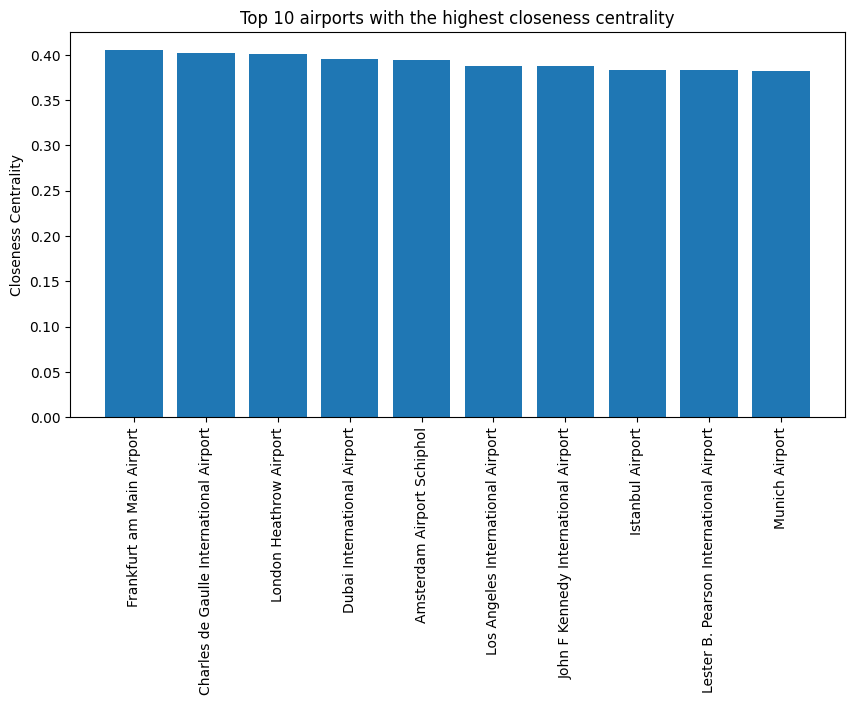

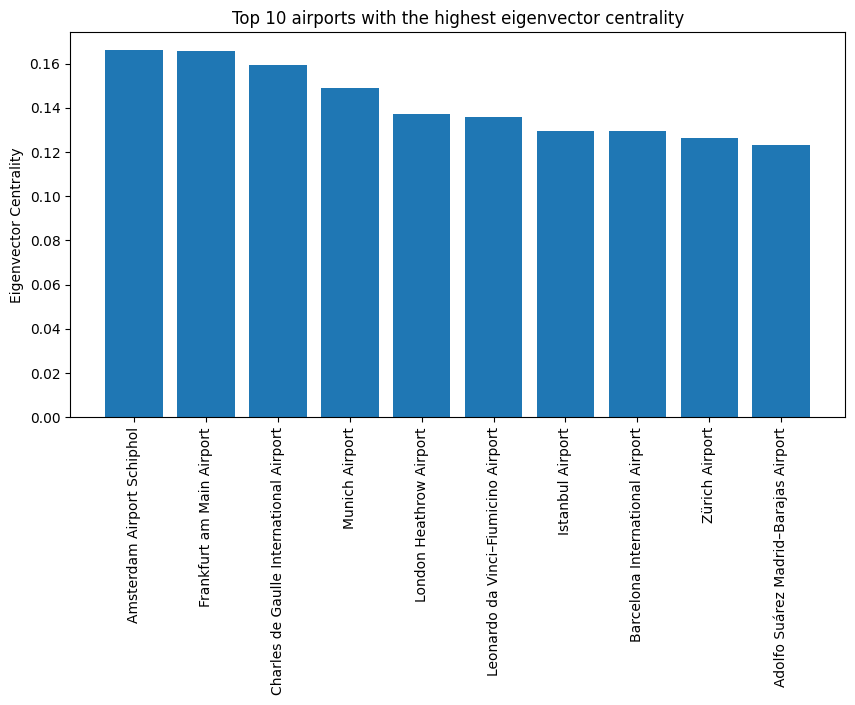

In [5]:
## plot the closeness centrality and eigenvector centrality
plt.figure(figsize=(10, 5))
plt.bar([G.nodes[k]["name"] for k, v in sorted_closeness_centrality[:10]],
        [v for k, v in sorted_closeness_centrality[:10]])
plt.xticks(rotation=90)
plt.ylabel('Closeness Centrality')
plt.title('Top 10 airports with the highest closeness centrality')
#plt.savefig('images/top10_airports_closeness.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar([G.nodes[k]["name"] for k, v in sorted_eigenvector_centrality[:10]],
        [v for k, v in sorted_eigenvector_centrality[:10]])
plt.xticks(rotation=90)
plt.ylabel('Eigenvector Centrality')
plt.title('Top 10 airports with the highest eigenvector centrality')
#plt.savefig('images/top10_airports_eigenvector.png', dpi=300, bbox_inches='tight')
plt.show()

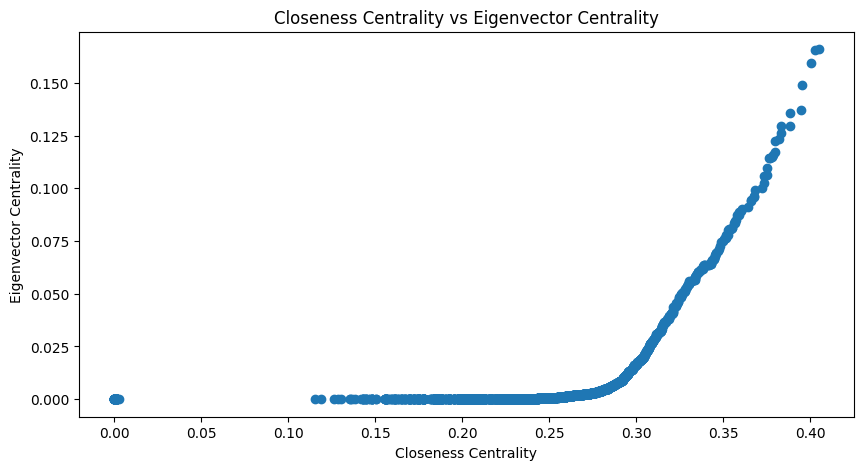

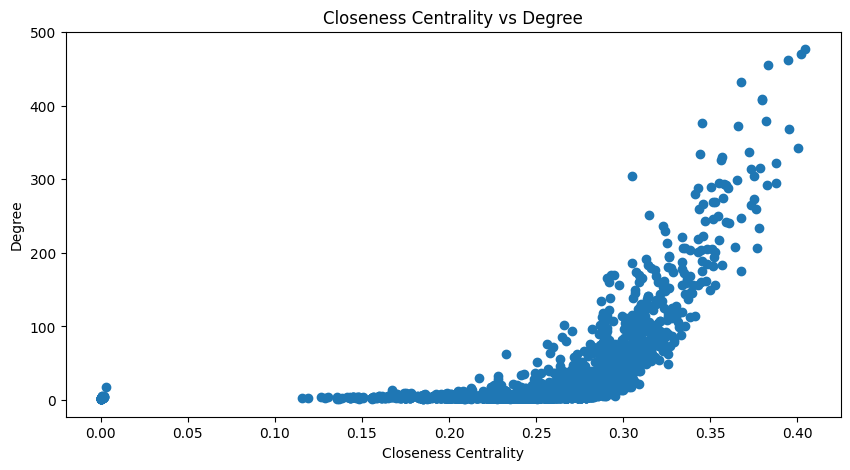

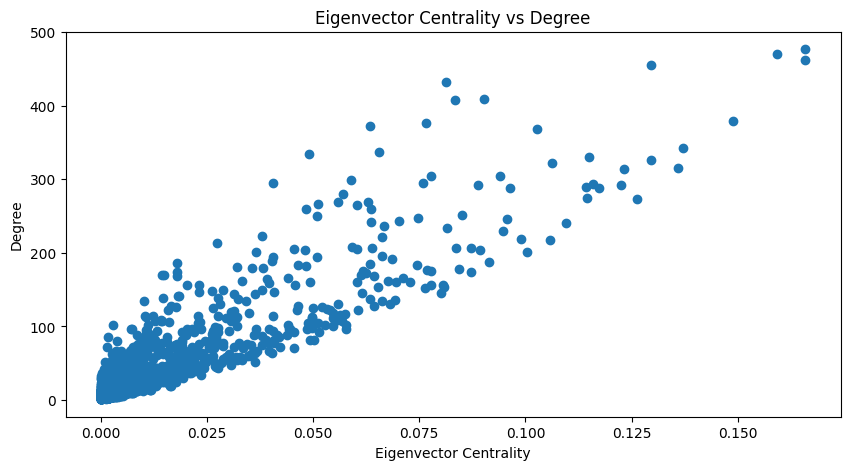

In [20]:
## Create scatter plot of closeness centrality vs eigenvector centrality
plt.figure(figsize=(10, 5))
plt.scatter([v for k, v in sorted_closeness_centrality], [v for k, v in sorted_eigenvector_centrality])
plt.xlabel('Closeness Centrality')
plt.ylabel('Eigenvector Centrality')
plt.title('Closeness Centrality vs Eigenvector Centrality')
#plt.savefig('images/closeness_vs_eigenvector.png', dpi=300, bbox_inches='tight')
plt.show()

## Create scatter plot of closeness centrality vs degree
plt.figure(figsize=(10, 5))
plt.scatter([v for k, v in sorted_closeness_centrality], [G.degree(k) for k, v in sorted_closeness_centrality])
plt.xlabel('Closeness Centrality')
plt.ylabel('Degree')
plt.title('Closeness Centrality vs Degree')
#plt.savefig('images/closeness_vs_degree.png', dpi=300, bbox_inches='tight')
plt.show()

## Create scatter plot of eigenvector centrality vs degree
plt.figure(figsize=(10, 5))
plt.scatter([v for k, v in sorted_eigenvector_centrality], [G.degree(k) for k, v in sorted_eigenvector_centrality])
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Degree')
plt.title('Eigenvector Centrality vs Degree')
#plt.savefig('images/eigenvector_vs_degree.png', dpi=300, bbox_inches='tight')
plt.show()


In [26]:
## config function

from tqdm import tqdm

def double_edge_swap(graph, num_swaps=None):
    #Create a copy of the graph
    H = graph.copy()
    if num_swaps is None:
        num_swaps = H.number_of_edges() * 10
    edges = list(H.edges())
    n = len(edges)
    for _ in range(num_swaps):
        while True:
            #Select two edges
            i, j = random.sample(range(n), 2)
            e1 = edges[i]
            e2 = edges[j]
            #Flip the direction of e1 with a 50% chance
            if random.random() < 0.5:
                e1 = (e1[1], e1[0])
            #Avoid self-loops and multi-edges
            if e1[0] != e2[1] and e1[1] != e2[0] and not H.has_edge(e1[0], e2[1]) and not H.has_edge(e2[0], e1[1]):
                #Create new edges e1' and e2'
                e1_new = (e1[0], e2[1])
                e2_new = (e2[0], e1[1])
                break
        #Swap edges
        if H.has_edge(*e1) and H.has_edge(*e2):  # Check if the edges exist in the graph
            H.remove_edge(*e1)
            H.remove_edge(*e2)
            H.add_edge(*e1_new)
            H.add_edge(*e2_new)
            #Update
            edges[i] = e1_new
            edges[j] = e2_new
    return H

random_network = double_edge_swap(G)
assert sorted([d for n, d in G.degree()]) == sorted([d for n, d in random_network.degree()])
print("Degree of nodes in the original network and the new 'randomized' version of the network are the same.")

list_of_graphs = []
for i in tqdm(range(100)):
    random_network = double_edge_swap(G)
    list_of_graphs.append(random_network)

Degree of nodes in the original network and the new 'randomized' version of the network are the same.


100%|██████████| 100/100 [06:31<00:00,  3.92s/it]
